In [45]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [46]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory('input/Mask_Datasets/Train',target_size=(128,128))

Found 750 images belonging to 2 classes.


In [47]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 128, 128, 3)
Label batch shape:  (32, 2)


In [48]:
# feature_extractor_url='https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'
# IMAGE_SHAPE = (299,299)
# classifier = tf.keras.Sequential([hub.KerasLayer(feature_extractor_url,input_shape= (299,299,3),output_shape=[2048])])

In [49]:
model=keras.Sequential([
    keras.layers.Convolution2D(64,(3,3),input_shape=(128,128,3),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Flatten(input_shape=(64,64)),
    keras.layers.Dense(2,activation=tf.nn.softmax)
])

In [50]:
labels = ['Mask','No Mask']
# classifier.trainable=False
# model = tf.keras.Sequential(
#     [classifier,tf.keras.layers.Dense(image_data.num_classes, activation='softmax')]
# )

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dense_12 (Dense)             (None, 63, 63, 128)       8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 128)       0         
_________________________________________________________________
dense_13 (Dense)             (None, 63, 63, 128)       16512     
_________________________________________________________________
flatten_4 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                

In [38]:
prediction = model(image_batch)
prediction.shape

TensorShape([32, 2])

In [52]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [53]:
steps = np.floor(image_data.samples/image_data.batch_size)

In [54]:
history = model.fit(image_data,epochs=5, steps_per_epoch= steps)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23.0 steps
Epoch 1/5
23/23 [==============================] - 34s 1s/step - loss: 0.9403 - accuracy: 0.7256
Epoch 2/5
23/23 [==============================] - 32s 1s/step - loss: 0.1559 - accuracy: 0.9373
Epoch 3/5
23/23 [==============================] - 32s 1s/step - loss: 0.1115 - accuracy: 0.9513
Epoch 4/5
23/23 [==============================] - 32s 1s/step - loss: 0.0645 - accuracy: 0.9796
Epoch 5/5
23/23 [==============================] - 31s 1s/step - loss: 0.0580 - accuracy: 0.9777


In [57]:
test_data=image_generator.flow_from_directory('input/Mask_Datasets/Validation/Test_Folder',target_size=(128,128))

Found 30 images belonging to 1 classes.


In [58]:
ypred  = model.predict(test_data)

In [59]:
pred_id = np.argmax(ypred,axis = -1)

In [60]:
actual_id = np.argmax(label_batch, axis=-1)

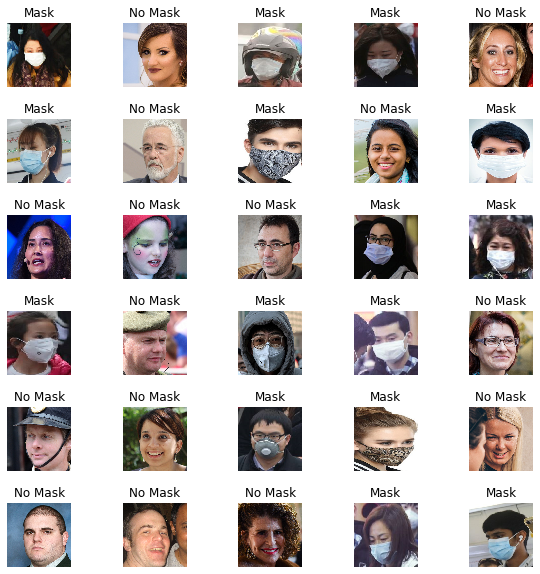

In [61]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(test_data[0][0][i])
#     color='green' if pred_id[i]==actual_id[i] else 'red'
    plt.title(labels[pred_id[i]])
    plt.axis('off')
plt.show()